# Проект 2. Разведовательный анализ данных. Суть — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

#### Загружаем данные о студентах

In [350]:
# 1. Загружаем необходимые библиотеки, файл для анализа и 50 строк и столбцов, задаем названия столбцам
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 400)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

student = pd.read_csv('c:/stud_math.csv', header=0)
# переименуем переменные
student.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob',
                   'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
                   'famsup', 'paid', 'activities', 'nursery', "studytime_granular", 'higher', 'internet', 'romantic',
                   'famrel', 'freetime', 'goout', 'health', 'absences', 'score']

# выводим первые 40 строк датасета, а также информацию о нем
display(student.head(40))
student.info()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

По итогам загрузки и просмотра данных набор содержит данные о 396 учениках. Столбцы school, age, sex не содержат пропусков, остальные 27, включая целевую переменную score содержат Nan. 

17 столбцов со строковым типом данных, остальные с числовым типом данных, при этом в числовые столбцы попали переменные, которые содержат категорийные значения, закодированные чиловым значением.

In [351]:
# вычислим процент максимального / минимального количества пропусков в стоках набора данных для принятия решения
# по строками с большимим количеством пропусков в данных
misses_max = max(student.apply(lambda x: sum(
    x.isnull()), axis=1,))/student.shape[1]
misses_min = min(student.apply(lambda x: sum(
    x.isnull()), axis=1,))/student.shape[1]
print('Максимальное количество пропусков в строке:', round(misses_max*100), '%')
print('Минимальное количество пропусков в строке:', round(misses_min*100), '%')

Максимальное количество пропусков в строке: 20 %
Минимальное количество пропусков в строке: 0 %


На основе расчета количества пропусков можно сделать выводы о максимальном количестве пропусков в строках - 20%. Также просматривая строки с данными и NaN визуально не обнаружил группировок NaN (кластеров), на основе чего делаю предположение о равномерном распределении NaN среди значений столбцов.

Исходя из вышеуказанных расчетов и наблюдений, предлагаю не удалять NaN из данных, а заполнить их медианой или модой в зависимости от типа данных. Исключение для заполнения пропусков составит целевая переменная score.

#### Задаем функции

In [352]:
# функция выводит информацию с описанием переменной, считает пропуски в данных, визуализирует переменные
def column_info(student_column, hist_name='None'):
    # Опеределяем тип данных атрибута
    if student_column.dtype == 'int64' or student_column.dtype == 'float64':

        # Выводим описание переменной
        # display(student_column.describe())
        # Считаем пропуски в данных
        print('Пропущенных значений: {}' .format(student_column[student_column.isnull() == True].size),
              '\nПроцент пропущенных данных: {}%' .format(round(student_column[student_column.isnull() == True].size*100/395)))
        print('Уникальные значения: {}' .format(student_column.unique()),
              '\nКоличество уникальных значений: \n{}'.format(student_column.value_counts()))

        # Пробуем найти выбросы в данных, для этого буду строить столбчатые диаграммы
        sns.countplot(x=student_column, data=student)

    else:
        # Считаем пропуски в данных
        print('Пропущенных значений: {}' .format(student_column[student_column.isnull() == True].size),
              '\nПроцент пропущенных данных: {}%' .format(round(student_column[student_column.isnull() == True].size*100/395)))
        print('Уникальные значения: {}' .format(student_column.unique()),
              '\nКоличество уникальных значений: \n{}'.format(student_column.value_counts()))

        # строим график соотношения уникальных значений друг относительно друга
        sns.countplot(x=student_column, data=student)


# функция принимает датафрейм с переменными, два признака и показывает boxplot
def get_boxplot(data, column, score_column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score', data=data.loc[data.loc[:, column].isin(
        data.loc[:, column].value_counts().index[:10])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# функция проверяет, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.


def get_stat_dif(data, column, score_column):

    cols = student_nom.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        p_value = ttest_ind(data.loc[data.loc[:, column] == comb[0], score_column],
                            data.loc[data.loc[:, column] == comb[1], score_column]).pvalue
        if p_value <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Внимание! Найдены статистически значимые различия для переменных {} и {}'
                  .format(column, score_column))
            break
    else:
        print('Статистические различия для переменных {} и {} не найдены '
              .format(column, score_column))

#### Переменная "Школа" (school)

Пропущенных значений: 0 
Процент пропущенных данных: 0%
Уникальные значения: ['GP' 'MS'] 
Количество уникальных значений: 
GP    349
MS     46
Name: school, dtype: int64


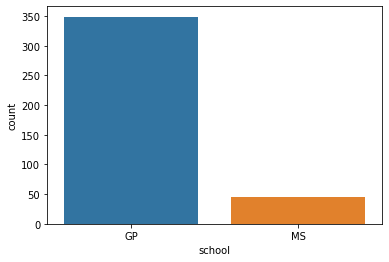

In [353]:
column_info(student.school)

Выборка с оценками только 2 школ GP, MS что может быть недостаточно для построения модели

#### Поведем анализ переменных

#### Переменная "Возраст" (age)

Пропущенных значений: 0 
Процент пропущенных данных: 0%
Уникальные значения: [18 17 15 16 19 22 20 21] 
Количество уникальных значений: 
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


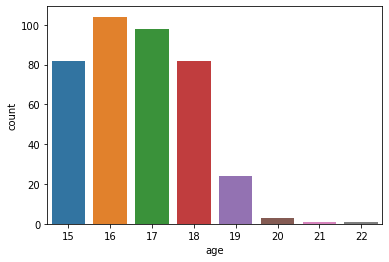

In [354]:
column_info(student.age)

В переменной age есть незначительное количество учеников с возрастом 20-22, что отличается от основной массы учеников от 15 до 19 лет. Возможно эти студенты переносили свое обучение на год, два или учатся по расширенной программе обучения.

#### Переменная "Пол" (sex)

Пропущенных значений: 0 
Процент пропущенных данных: 0%
Уникальные значения: ['F' 'M'] 
Количество уникальных значений: 
F    208
M    187
Name: sex, dtype: int64


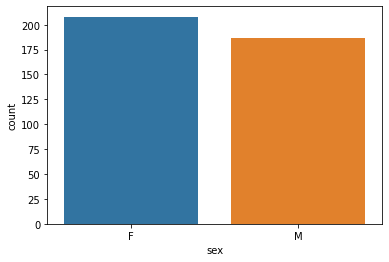

In [355]:
column_info(student.sex)

Распределение между юношами и девушками примерно одинаково, пропущенных значений нет

#### Переменная "Адрес" (address)

Пропущенных значений: 17 
Процент пропущенных данных: 4%
Уникальные значения: ['U' nan 'R'] 
Количество уникальных значений: 
U    295
R     83
Name: address, dtype: int64


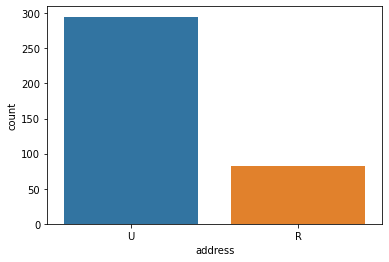

In [356]:
column_info(student.address)

В большинстве студенты живут в городе, меньшинство за городом. В переменной 4% пропущенных значений, которые заменим на значение переменной U - город, т.к. большинство студентов живут в городе.

In [357]:
student.address = student.address.apply(lambda x: 'U' if pd.isnull(x) else x)

#### Переменная "Размер семьи" (famsize)

Пропущенных значений: 27 
Процент пропущенных данных: 7%
Уникальные значения: [nan 'GT3' 'LE3'] 
Количество уникальных значений: 
GT3    261
LE3    107
Name: famsize, dtype: int64


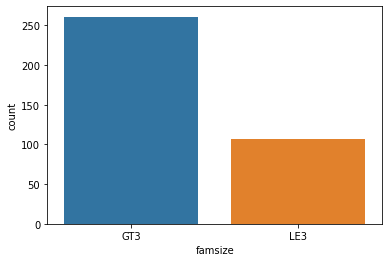

In [358]:
column_info(student.famsize)

В большинстве семей студентов более трех детей, остальные (42 процента) семьи включают менее 3 детей. 7 процентов пропусков в данных которые заменим на значение GT3 - семьи где более трех детей.

In [359]:
student.famsize = student.famsize.apply(lambda x: 'GT3' if pd.isnull(x) else x)

#### Переменная "Статус совместного жилья родителей" (pstatus)

Пропущенных значений: 45 
Процент пропущенных данных: 11%
Уникальные значения: ['A' nan 'T'] 
Количество уникальных значений: 
T    314
A     36
Name: pstatus, dtype: int64


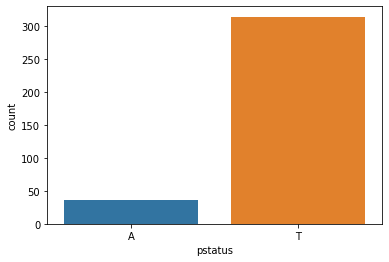

In [360]:
column_info(student.pstatus)

Переменная характеризует семейный статус родителей (в браке или разводе), на диаграмме видно что разведенных меньшинство. Кроме того 45 значений пропущены, предлагаю заменить их на медиану - значение Т (в браке) 

In [361]:
student.pstatus = student.pstatus.apply(lambda x: 'T' if pd.isnull(x) else x)

#### Переменная "Образование матери" (medu)

Пропущенных значений: 3 
Процент пропущенных данных: 1%
Уникальные значения: [ 4.  1.  3.  2. nan  0.] 
Количество уникальных значений: 
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: medu, dtype: int64


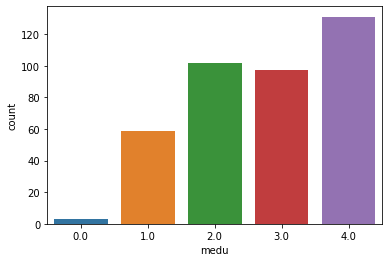

In [362]:
column_info(student.medu)

Более половины матерей студентов имеют высшее и средне образование, и все мамы студентов учились в школе. В данных три пропуска, которые заменим на медиану.

In [363]:
student.medu = student.medu.fillna(student.medu.median())

#### Переменная "Образование отца" (fedu)

Пропущенных значений: 24 
Процент пропущенных данных: 6%
Уникальные значения: [ 4.  1.  2.  3. 40. nan  0.] 
Количество уникальных значений: 
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64


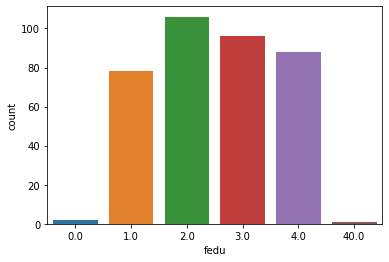

In [364]:
column_info(student.fedu)

Более половины отцов студентов имеют высшее и среднее образование и все отцы студентов ходили в школу. В данных есть выброс 40
и 2 пропущенных значения, предлагаю выброс и пропуски заменить на медиану.

In [365]:
student.fedu = student.fedu.fillna(student.fedu.median())
student.fedu = student.fedu.replace({40: (student.fedu.median())})

#### Переменная "Работа матери" (mjob)

Пропущенных значений: 19 
Процент пропущенных данных: 5%
Уникальные значения: ['at_home' 'health' 'other' 'services' 'teacher' nan] 
Количество уникальных значений: 
other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64


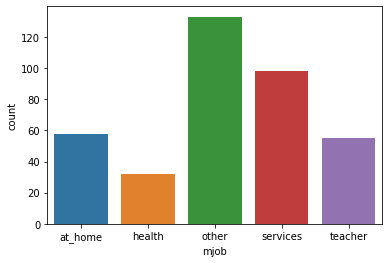

In [366]:
column_info(student.mjob)

Атрибут работа матери студента содержит 5% пропусков которые будут заменены на медиану. Классификация работы составлена не удачно, содержит специальности (учитель) или отрасль (здоровье), а наиболее часто встречаемое значение прочая работа не позволяет понять где заняты мамы студентов (проблема составления классификатора/опросника, на основе которого был составлен датасет). 

In [367]:
student.mjob = student.mjob.fillna(student.mjob.mode()[0])

#### Переменная "Работа отца" (fjob)

Пропущенных значений: 36 
Процент пропущенных данных: 9%
Уникальные значения: ['teacher' 'other' nan 'health' 'services' 'at_home'] 
Количество уникальных значений: 
other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64


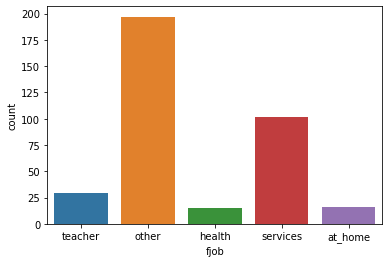

In [368]:
column_info(student.fjob)

Атрибут работа отца, похож по проблематике на атрибут работа матери. Пропущенные значения будут заменены на моду.

In [369]:
student.fjob = student.fjob.fillna(student.fjob.mode()[0])

#### Переменная  "Причина выбора школы" (reason)

Пропущенных значений: 17 
Процент пропущенных данных: 4%
Уникальные значения: ['course' 'other' 'home' 'reputation' nan] 
Количество уникальных значений: 
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


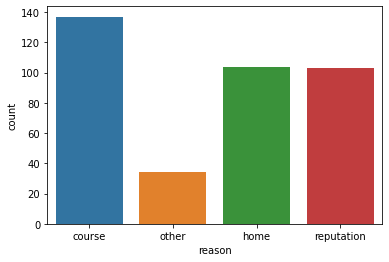

In [370]:
column_info(student.reason)

В большинстве родители выбирали школу для детей в первую очередь исходя из программы, и в меньшей степени репутации и близости к дому. Атрибут причина выбора школы содержит 17 пропущенных значений которые будут заменены на моду.

In [371]:
student.reason = student.reason.fillna(student.reason.mode()[0])

#### Переменная "Опекун" (guardian)

Пропущенных значений: 31 
Процент пропущенных данных: 8%
Уникальные значения: ['mother' 'father' 'other' nan] 
Количество уникальных значений: 
mother    250
father     86
other      28
Name: guardian, dtype: int64


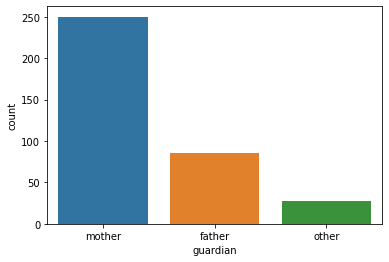

In [372]:
column_info(student.guardian)

В большинстве случаев мамы следят за детьми, нежели отцы. 31 пропуск будет заменен на моду.

In [373]:
student.guardian = student.guardian.fillna(student.guardian.mode()[0])

#### Переменная "Время в дороге до школы" (traveltime)

Пропущенных значений: 28 
Процент пропущенных данных: 7%
Уникальные значения: [ 2.  1.  3. nan  4.] 
Количество уникальных значений: 
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


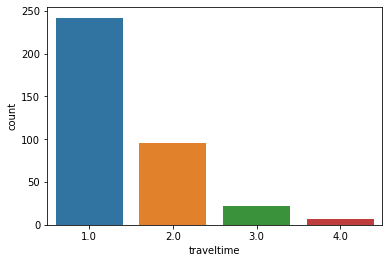

In [374]:
column_info(student.traveltime)

Исходя из значений атрибута большинство студентов живут рядом с учебным заведением, а 28 человек живут за городом или в отдаленных от школы районах. Пропуски заменим на медиану.

In [375]:
student.traveltime = student.traveltime.fillna(student.traveltime.median())

#### Переменная "Время на учебу помимо школы" (studytime)

Пропущенных значений: 7 
Процент пропущенных данных: 2%
Уникальные значения: [ 2.  3.  1. nan  4.] 
Количество уникальных значений: 
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


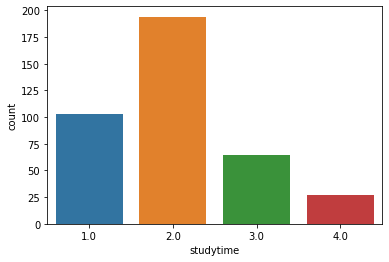

In [376]:
column_info(student.studytime)

Большинство студентов тратит на учебу 2-2,5 часа. Пропущенные значения меняем на медиану.

In [377]:
student.studytime = student.studytime.fillna(student.studytime.median())

#### Переменная "Количество внеучебных неудач" (failures)

Пропущенных значений: 22 
Процент пропущенных данных: 6%
Уникальные значения: [ 0.  3. nan  2.  1.] 
Количество уникальных значений: 
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64


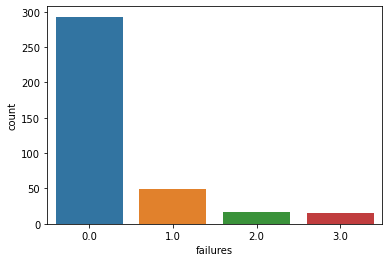

In [378]:
column_info(student.failures)

Необходимо уточнить смысл значений атрибута, методику сбора данных, и его отношение к датасету. Пропущенные значения меняем на медиану.

In [379]:
student.failures = student.failures.fillna(student.failures.median())

#### Переменная "Школьная поддержка" (schoolsup)

Пропущенных значений: 9 
Процент пропущенных данных: 2%
Уникальные значения: ['yes' 'no' nan] 
Количество уникальных значений: 
no     335
yes     51
Name: schoolsup, dtype: int64


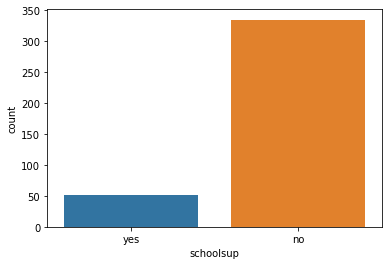

In [380]:
column_info(student.schoolsup)

Большинство студентов не имеет дополнительной образовательной поддеркжи, пропуски в данных меняем на моду.

In [381]:
student.schoolsup = student.schoolsup.fillna(student.schoolsup.mode()[0])

#### Переменная "Семейная образовательная поддержка" (famsup)

Пропущенных значений: 39 
Процент пропущенных данных: 10%
Уникальные значения: ['no' 'yes' nan] 
Количество уникальных значений: 
yes    219
no     137
Name: famsup, dtype: int64


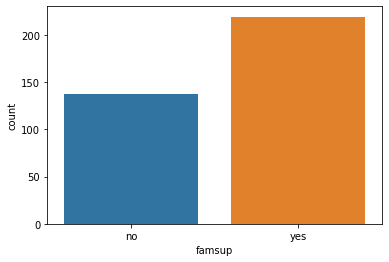

In [382]:
column_info(student.famsup)

Семьи поддерживают большую часть учащихся, пропуски в данных заменяем на моду. Также переменные школьная и семейная поддеркжа похожи по смыслу, и будут объединены в одну переменную support

In [383]:
student.famsup = student.famsup.fillna(student.famsup.mode()[0])
student['support'] = np.where((student.schoolsup == 'yes') | (
    student.famsup == 'yes'), 'yes', 'no')

#### Переменная "Доп. платные занятия по математике" (paid)

Пропущенных значений: 40 
Процент пропущенных данных: 10%
Уникальные значения: ['no' nan 'yes'] 
Количество уникальных значений: 
no     200
yes    155
Name: paid, dtype: int64


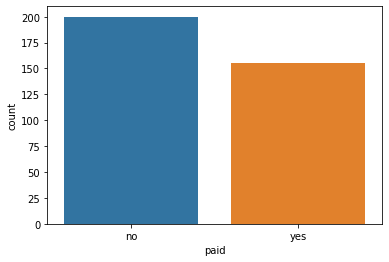

In [384]:
column_info(student.paid)

Большая часть студентов не пользовалась доп. занятиями по математике. Пропущенные значения меняем на моду.

In [385]:
student.paid = student.paid.fillna(student.paid.mode()[0])

#### Переменная "Дополнительные внеучебные занятия" (activities)

Пропущенных значений: 14 
Процент пропущенных данных: 4%
Уникальные значения: ['no' 'yes' nan] 
Количество уникальных значений: 
yes    195
no     186
Name: activities, dtype: int64


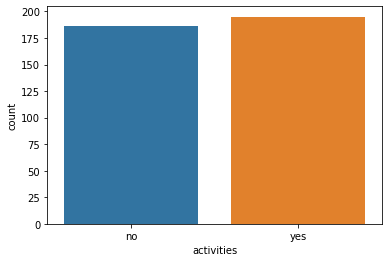

In [386]:
column_info(student.activities)

Практически одинаково распределились посещающие доп. занятия и студенты которым они не нужны. Пропуски в данных заменяем модой.

In [387]:
student.activities = student.paid.fillna(student.activities.mode()[0])

#### Переменная "Посещал детский сад" (nursery)

Пропущенных значений: 16 
Процент пропущенных данных: 4%
Уникальные значения: ['yes' 'no' nan] 
Количество уникальных значений: 
yes    300
no      79
Name: nursery, dtype: int64


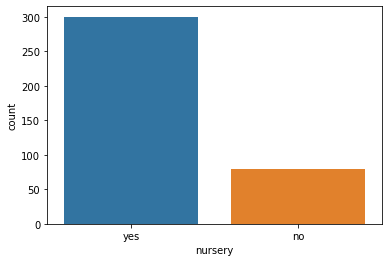

In [388]:
column_info(student.nursery)

79% студентов посещали детский сад, пропуски в данных заменяем модой

In [389]:
student.nursery = student.paid.fillna(student.nursery.mode()[0])

#### Переменная "Studytime_granular" (studytime_granular)

Пропущенных значений: 7 
Процент пропущенных данных: 2%
Уникальные значения: [ -6.  -9.  -3.  nan -12.] 
Количество уникальных значений: 
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64


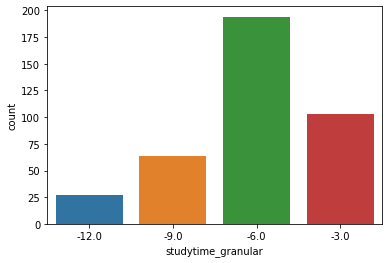

In [390]:
column_info(student.studytime_granular)

Описание показателя отсутствует, числовые значения не позволяют их как либо истолковать в т.ч. относительно переменной studytime. Удаляю этот показатель из набора данных.

In [391]:
student = student.drop(columns='studytime_granular')

#### Переменная "Хочет получить высшее образование" (higher)

Пропущенных значений: 20 
Процент пропущенных данных: 5%
Уникальные значения: ['yes' nan 'no'] 
Количество уникальных значений: 
yes    356
no      19
Name: higher, dtype: int64


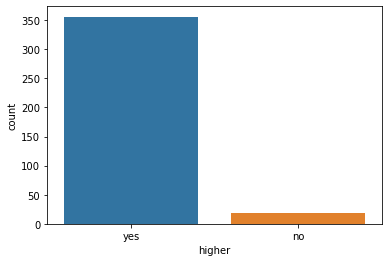

In [392]:
column_info(student.higher)

Подавляющее большинство хочет получить высшее образование, пропуски меняем на моду.

In [393]:
student.higher = student.higher.fillna(student.higher.mode()[0])

#### Переменная "Наличие интернета дома (internet)"

Пропущенных значений: 34 
Процент пропущенных данных: 9%
Уникальные значения: [nan 'yes' 'no'] 
Количество уникальных значений: 
yes    305
no      56
Name: internet, dtype: int64


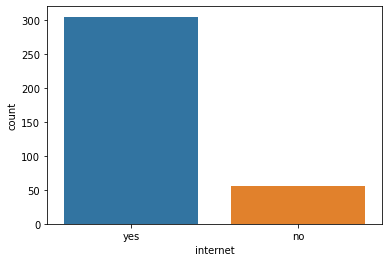

In [394]:
column_info(student.internet)

У почти 80% учащихся есть интернет, пропуски в данных меняем на моду

In [395]:
student.internet = student.internet.fillna(student.internet.mode()[0])

####  Переменная "В романтических отношениях  (romantic)"

Пропущенных значений: 31 
Процент пропущенных данных: 8%
Уникальные значения: ['no' nan 'yes'] 
Количество уникальных значений: 
no     240
yes    124
Name: romantic, dtype: int64


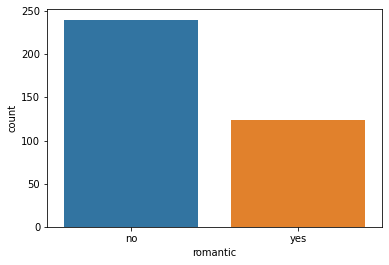

In [396]:
column_info(student.romantic)

Большинство студентов не состоит в романтических отношениях, пропуски в данных меняем на моду

In [397]:
student.romantic = student.romantic.fillna(student.romantic.mode()[0])

#### Переменная "Уровень семейных отношений (famrel)"

Пропущенных значений: 27 
Процент пропущенных данных: 7%
Уникальные значения: [ 4.  5.  3. nan -1.  2.  1.] 
Количество уникальных значений: 
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


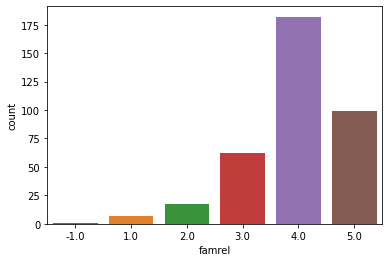

In [398]:
column_info(student.famrel)

У большинства студентов высокий и отличный уровень семейных отношений, примерно у 6% плохие и очень плохие отношения. Возможно один из учащихся хотел показать, что отношения хуже некуда и поставил -1, при возможных вариантах от 1 до 5. Значение -1 меняем на 1, пропуски в данных меняем на медиану.

In [399]:
student.famrel = student.famrel.replace({-1:1})
student.famrel = student.famrel.fillna(student.famrel.median())

#### Переменная "Свободное время после школы (freetime)"

Пропущенных значений: 11 
Процент пропущенных данных: 3%
Уникальные значения: [ 3.  2.  4.  1.  5. nan] 
Количество уникальных значений: 
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


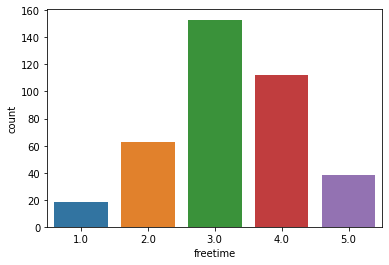

In [400]:
column_info(student.freetime)

Большинство студентов имеют свободное время для отдыха от учёбы. Пропуски в данных меняем на медиану.

In [401]:
student.freetime = student.freetime.fillna(student.freetime.median())

#### Переменная "Проведение времени с друзьями" (goout)

Пропущенных значений: 8 
Процент пропущенных данных: 2%
Уникальные значения: [ 4.  3.  2.  1.  5. nan] 
Количество уникальных значений: 
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


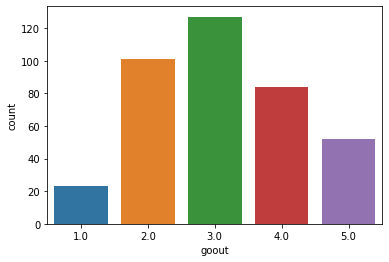

In [402]:
column_info(student.goout)

Значения атрибута распределены практически равномерно, у студентов есть время для общения с друзьями. Пропуски меняем на медиану.

In [403]:
student.goout = student.goout.fillna(student.goout.median())

#### Переменная "Текущее состояние здоровья" (health)

Пропущенных значений: 15 
Процент пропущенных данных: 4%
Уникальные значения: [ 3.  5.  1.  2.  4. nan] 
Количество уникальных значений: 
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


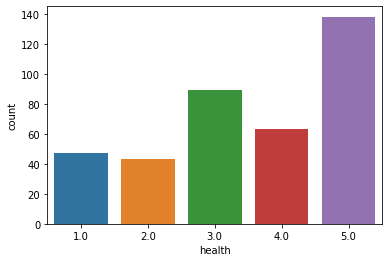

In [404]:
column_info(student.health)

Половина студентов оценивает своё состояние здоровья как удовлетворительное, пропуски в данных меняем на медиану.

In [405]:
student.health = student.health.fillna(student.health.median())

#### Переменная "Количество пропущенных занятий (absences)"

Пропущенных значений: 12 
Процент пропущенных данных: 3%
Уникальные значения: [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.] 
Количество уникальных значений: 
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


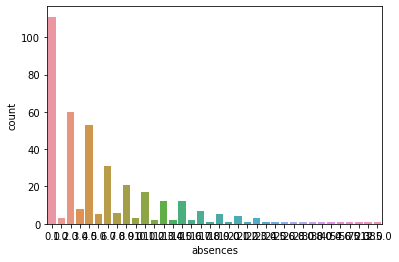

In [406]:
column_info(student.absences)

В значениях атрибута содержатся выбросы, со смещением вправо, есть пропущенные значения.  Определим границы выбросов по межквартильному расстоянию. 

In [407]:
IQR = student.absences.quantile(0.75) - student.absences.quantile(0.25)
perc25 = student.absences.quantile(0.25)
perc75 = student.absences.quantile(0.75)
print("Границы выбросов:", perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)

Границы выбросов: -12.0 20.0


постоим график для просмотра данных за границами выбросов, например до 100.

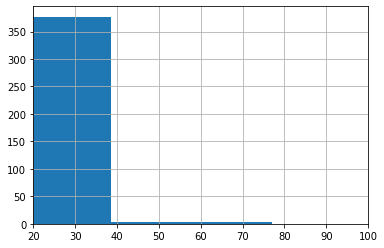

21.0     1
22.0     3
23.0     1
24.0     1
25.0     1
26.0     1
28.0     1
30.0     1
38.0     1
40.0     1
54.0     1
56.0     1
75.0     1
212.0    1
385.0    1
Name: absences, dtype: int64

In [408]:
ax = student.absences.hist(bins=10)
ax.set_xlim(20, 100)
plt.show()
display(student.absences[student.absences > 20].value_counts(
    ascending=True).sort_index(ascending=True))

Набор данных небольшой (390 строк) и данные пропущенных занятиях часто встречаются до 30, предлагаю их оставить как есть. Значения после 30 и пропуски в данных заменим на медиану.

In [409]:
student.absences = student.absences.apply(
    lambda x: student.absences.median() if x > 30 else x)
student.absences = student.absences.fillna(student.absences.median())

#### Целевая переменная "Баллы по госэкзамену по математике" (score)

Пропущенных значений: 6 
Процент пропущенных данных: 2%
Уникальные значения: [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.] 
Количество уникальных значений: 
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


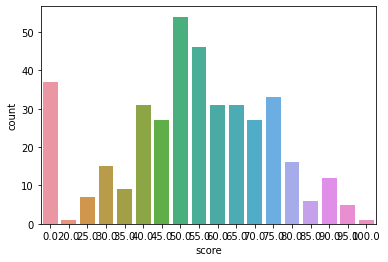

In [410]:
column_info(student.score)

In [411]:
IQR = student.score.quantile(0.75) - student.score.quantile(0.25)
perc25 = student.score.quantile(0.25)
perc75 = student.score.quantile(0.75)
print("Границы выбросов:", perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)

Границы выбросов: -5.0 115.0


Для оценки результатов студентов используется 100 бальная система. Выбросы в данных не нашел, 37 студентов получили 0 баллов, вероятно из-за методки оценки работ. В целевой переменной score есть пропущенные значения Nan, которые удаляем из данных. 

In [412]:
student.dropna(subset=['score'], inplace = True)

#### Корреляционный анализ числовых переменных

In [413]:
# отберем для числовые переменные и посмотрим на их корреляцию ц целевой переменной score
student_n = pd.DataFrame()
student_n = student.select_dtypes(["int64", "float64"])
round(student_n.corr().score.sort_values(), 2)

failures     -0.34
age          -0.16
goout        -0.13
health       -0.07
traveltime   -0.06
freetime      0.02
famrel        0.05
absences      0.07
studytime     0.11
fedu          0.12
medu          0.21
score         1.00
Name: score, dtype: float64

Выводы по корреляции целевой переменной score с числовыми переменными:
    - есть обратная корреляция между целевой переменной score и переменной количество внеучебных неудач failures - чем меньше внеучебных неудач тем выше оценки
    - отрицательная корреляция переменной age и целевой переменой показывает что младшие студенты имеют более хорошие оценки чем старшие
    - есть слабая корреляция между образованием матери и целевой переменной score, возможно из-за того что матери в большинстве были опекунами (guardian) у студентов, чем отцы, это повлияло на результат
    - переменная время на учебу вне школы слабо коррелируют с целевой переменной, что странно и говорит об ограниченности выборки
    - из-за отсутствия положительной или отрицательной корреляции (менее +-0,1) переменные: health,  traveltime, freetime, famrel, absences будут удалены

<AxesSubplot:>

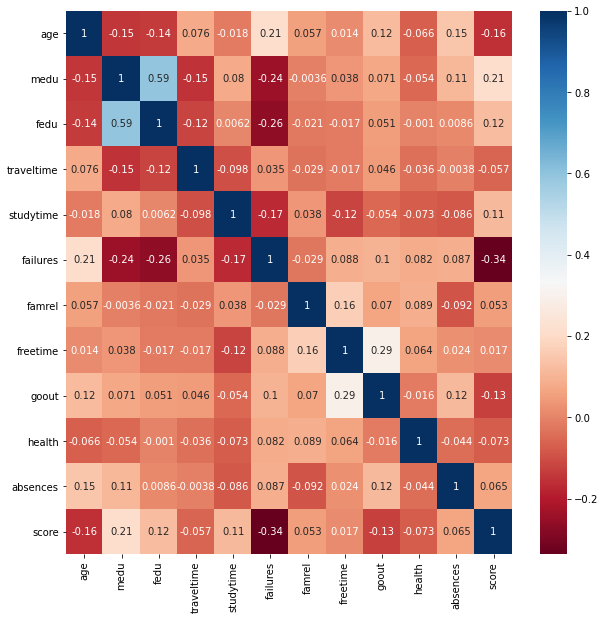

In [414]:
# построим тепловую карту с корреляцией остальных переменных
fig = plt.figure(figsize=(10,10))
sns.heatmap(student_n.corr(), annot=True, cmap='RdBu')

Выводы по тепловой карте:
    - слабая корреляция между переменными age и failures говорит о том что с увеличением возраста внеучебных неудач становится меньше
    - переменные medu и fedu (образование мамы и папы) сильно коррелируют между собой т.к. пары выбирают похожих на себя в т.ч. по уровню образования
    - слабая отрицательная корреляция medu, fedu (образование мамы и папы) и внеучебные неудачи детей (failures) говорит о том что у детей с более образованными родителями меньше внеучебных неудач
    - выглядит логичной корреляция между переменной freetime и goout
    - есть слабая корреляция между количеством пропущенных занятий, возрастом студентов и временем с друзьями - старшие студенты прогуливают чаще чем младшие и возможно проводят это время с друзьями    

#### Анализ номинативных переменных

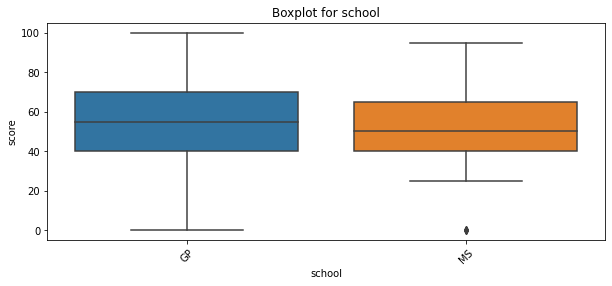

Статистические различия для переменных school и score не найдены 


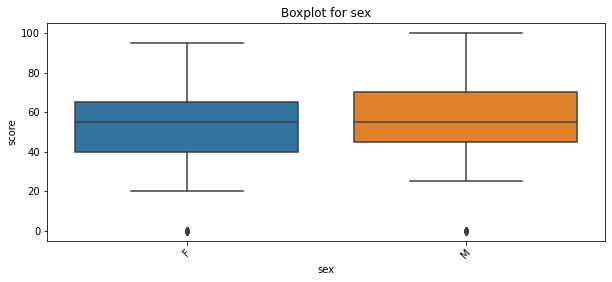

Статистические различия для переменных sex и score не найдены 


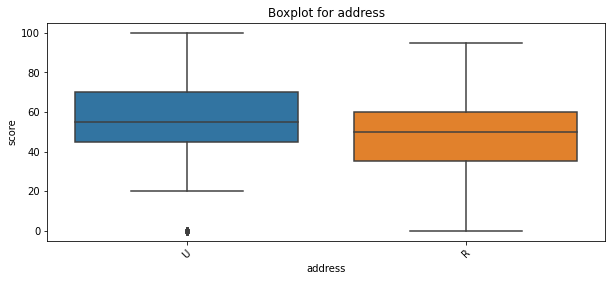

Внимание! Найдены статистически значимые различия для переменных address и score


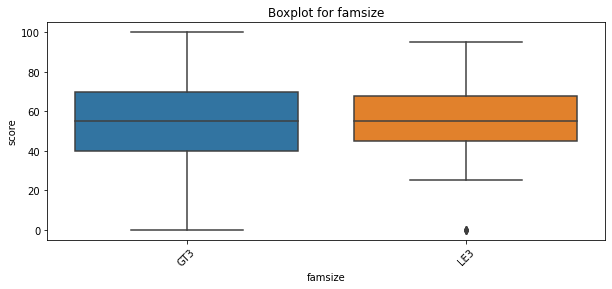

Статистические различия для переменных famsize и score не найдены 


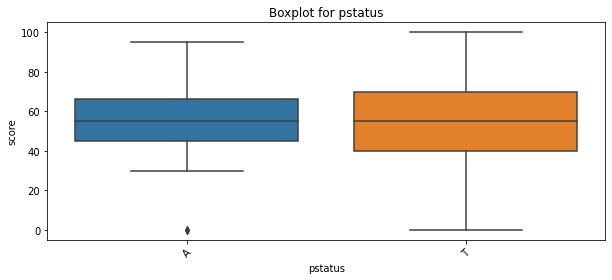

Статистические различия для переменных pstatus и score не найдены 


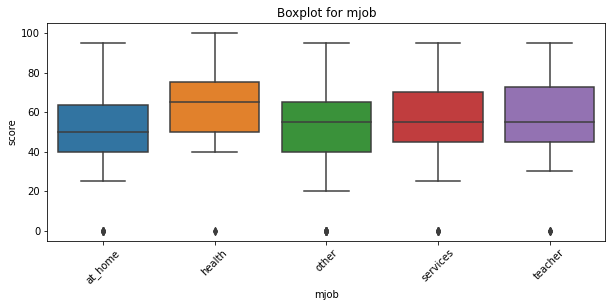

Внимание! Найдены статистически значимые различия для переменных mjob и score


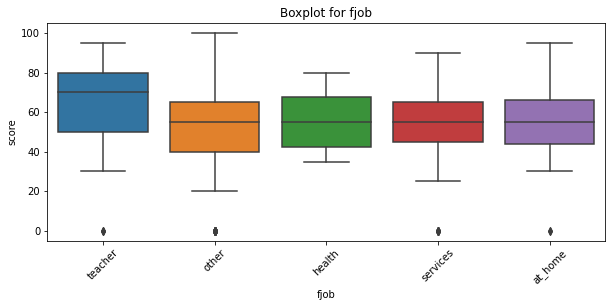

Статистические различия для переменных fjob и score не найдены 


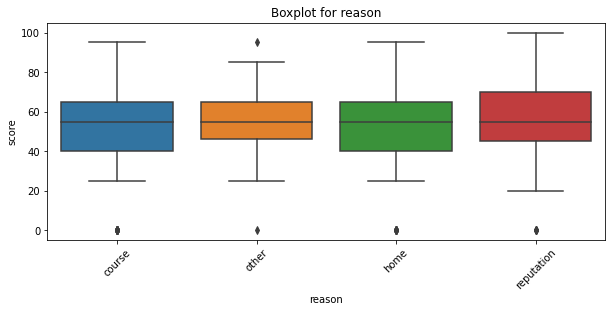

Статистические различия для переменных reason и score не найдены 


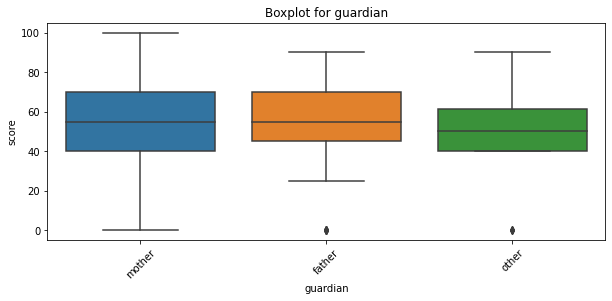

Статистические различия для переменных guardian и score не найдены 


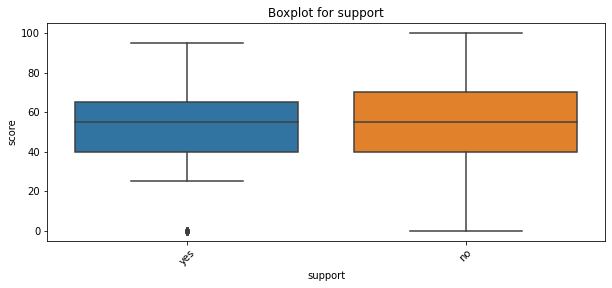

Статистические различия для переменных support и score не найдены 


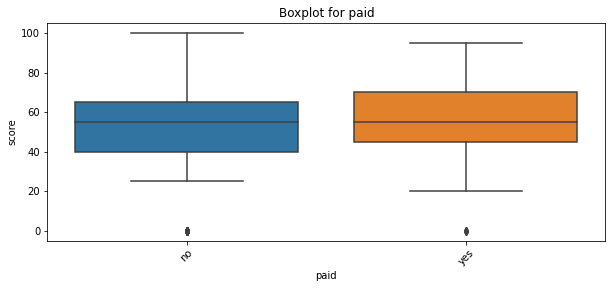

Статистические различия для переменных paid и score не найдены 


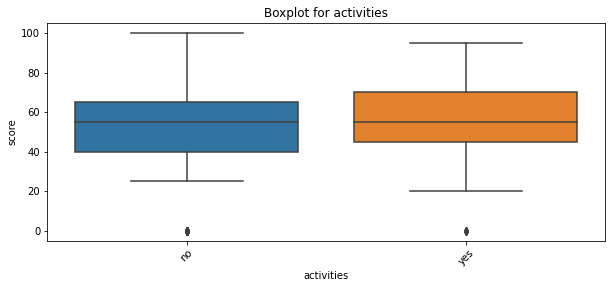

Статистические различия для переменных activities и score не найдены 


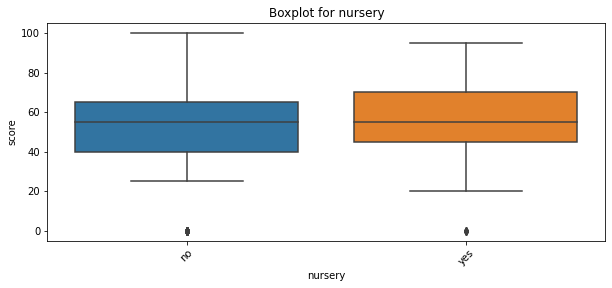

Статистические различия для переменных nursery и score не найдены 


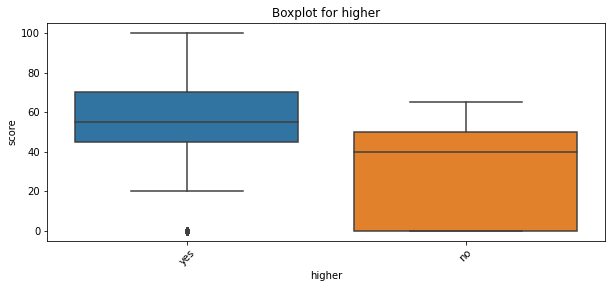

Внимание! Найдены статистически значимые различия для переменных higher и score


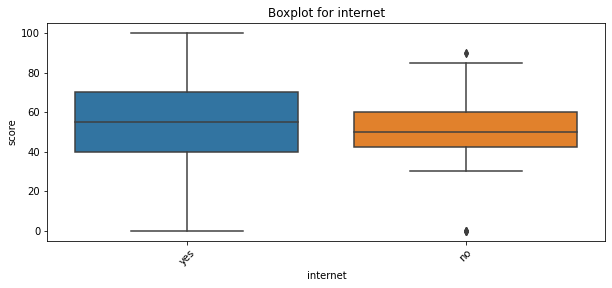

Статистические различия для переменных internet и score не найдены 


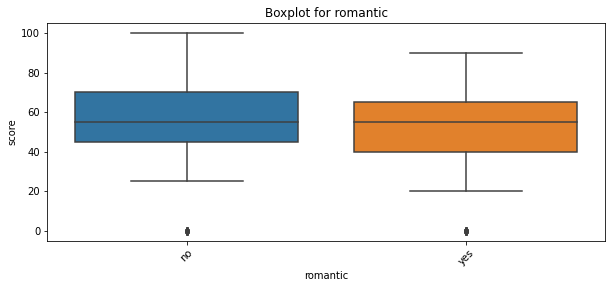

Внимание! Найдены статистически значимые различия для переменных romantic и score


In [415]:
# скопируем датафрейм для работы
student_nom = student.copy()
# запустим функции построения boxplot и поиска статистических различий в распределении оценок с помощью теста Стьюдента
for column in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'support', 'paid',
               'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(student_nom, column, 'score')
    get_stat_dif(student_nom, column, 'score')

#### Выводы : статистически значимые различия найдены для целевой переменной score и переменных: address, mjob, higher, romantic, остальные переменные, для которых статистические различия не найдены будут удалены

In [416]:
# удаляем количественные переменные
student = student.drop(
    ['health',  'traveltime', 'freetime', 'famrel', 'absences'], axis=1)

# удаляем номинативные переменные
student = student.drop(['school', 'sex', 'famsize', 'pstatus', 'fjob', 'reason',
                        'guardian', 'support', 'schoolsup', 'famsup', 'paid',
                        'activities', 'nursery', 'internet'], axis=1)

In [417]:
# датасет после удаления столбцов
student.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        389 non-null    int64  
 1   address    389 non-null    object 
 2   medu       389 non-null    float64
 3   fedu       389 non-null    float64
 4   mjob       389 non-null    object 
 5   studytime  389 non-null    float64
 6   failures   389 non-null    float64
 7   higher     389 non-null    object 
 8   romantic   389 non-null    object 
 9   goout      389 non-null    float64
 10  score      389 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 36.5+ KB


#### Итоги разведывательного анализа данных

1. Загружены библиотеки для анализа, проведена загрузка датасета c данными о студентах из файла, переименованы столбцы и проведен осмотр набора данных, заданы функции для дальнейшей обработки данных. 
    Набор содержит данные о 396 студентах и состоит из 30 переменных. Переменные school, age, sex не содержат пропусков, остальные 27, включая целевую переменную score содержат Nan.

2. Проведен осмотр переменных на пропуски в данных, выбросы в данных, подготовлены комментарии. По итогам анализа пропуски, выбросы в данных были заменены на медиану/моду. Переменная семейная, школьная поддержка была объединена в переменную поддержка т.к. эти переменные близки по смыслу.

3. Проведен корреляционный анализ целевой переменной "Баллы за гос. экзамен по математике" (score) с числовыми переменными. Выводы:
    - есть обратная корреляция между целевой переменной score и переменной количество внеучебных неудач failures - чем меньше внеучебных неудач тем выше оценки
    - отрицательная корреляция переменной age и целевой переменой показывает что младшие студенты имеют более хорошие оценки чем старшие
    - есть слабая корреляция между образованием матери и целевой переменной score, возможно из-за того что матери в большинстве были опекунами (guardian) у студентов, чем отцы, это повлияло на результат
    - переменная время на учебу вне школы слабо коррелируют с целевой переменной, что странно и говорит об ограниченности выборки
    - из-за отсутствия положительной или отрицательной корреляции (коэффициент менее +-0,1) переменные: health,  traveltime, freetime, famrel, absences удалены

4. Проведен анализ номинативных переменных на наличие статистической разницы в распределении оценок с помощью теста Стьюдента. Статистически значимые различия найдены для целевой переменной score и переменных: address, mjob, higher, romantic. Для переменных school, sex, famsize, pstatus, fjob, reason, guardian, support, famsup, paid, activities, nursery, internet статистические различия не найдены и они удалены и датасета.

5. По итогам выполненных в 1-4 работ датасет очищен от пропусков, переменных не влияющих на целевую переменную score и подготовлен для дальнейшего моделирования.